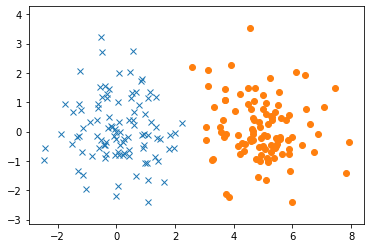

In [17]:
#4.1. a, but with single variable
import numpy as np
import matplotlib.pyplot as plt
class_1_x,class_1_y = np.random.default_rng().multivariate_normal([0,0],([1,0], [0,1]), 100).T
class_2_x,class_2_y = np.random.default_rng().multivariate_normal([5,0],([1,0], [0,1]), 100).T
plt.plot(class_1_x,class_1_y , 'x')
plt.plot(class_2_x,class_2_y , 'o')
plt.axis('equal')
plt.show()

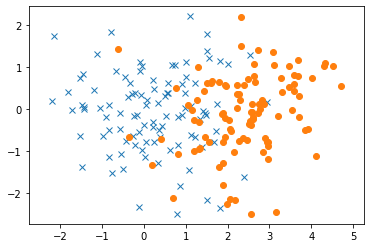

In [18]:
#4.1. b, but with single variable
import numpy as np
import matplotlib.pyplot as plt
class_1_x,class_1_y = np.random.default_rng().multivariate_normal([0,0],([1,0], [0,1]), 100).T
class_2_x,class_2_y = np.random.default_rng().multivariate_normal([2.25,0],([1,0], [0,1]), 100).T
plt.plot(class_1_x,class_1_y , 'x')
plt.plot(class_2_x,class_2_y , 'o')
plt.axis('equal')
plt.show()

0.85
[[26  4]
 [ 5 25]]


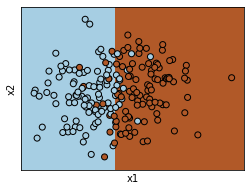

In [4]:
#4.1. c, but with single variable
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df1 = pd.DataFrame((np.random.default_rng().multivariate_normal([0,0],([1,0], [0,1]), 100)),columns=['x1','x2'])
df1['y'] = 0
#print(df1.head(5))
df2 = pd.DataFrame((np.random.default_rng().multivariate_normal([2.25,0],([1,0], [0,1]), 100)),columns=['x1','x2'])
df2['y'] = 1
#Created single dataset
df = pd.concat([df1,df2],ignore_index=True)
#randomalised the data
df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
#print(df[1:])

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(df[['x1', 'x2']], df['y'], test_size=0.3, random_state=42, shuffle=True,stratify=df['y'])
clf = LogisticRegression()
clf.fit(X_train,y_train)
predictions =clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)

# accuracy is 1

from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

"""
This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

"""
X = df[['x1','x2']].to_numpy() # we only take the first two features.

#print(X.head(5))
Y = df['y']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

#With stratified it gives 100% accuracy


[(-5, 5), Text(0, 0.5, '$X_2$'), (-5, 5), Text(0.5, 0, '$X_1$'), None]

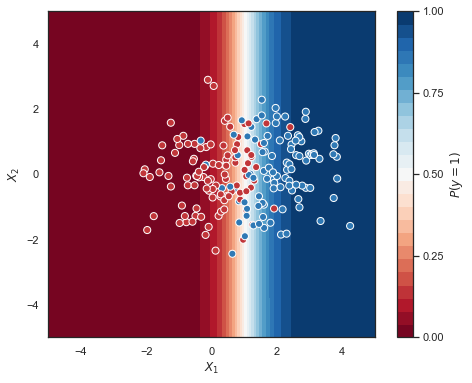

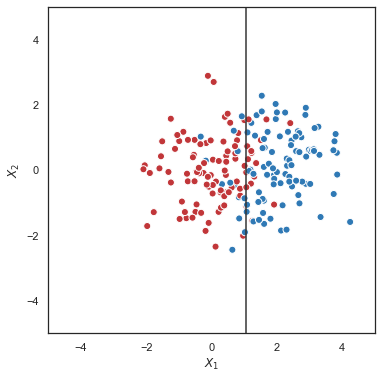

In [9]:
#show hypothesis space

import seaborn as sns
import numpy as np
sns.set(style="white")
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(df['x1'], df['x2'], c=df['y'], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(df['x1'], df['x2'], c=df['y'], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

In [ ]:
# Question 4.1 d  and e

https://web.stanford.edu/~jurafsky/slp3/5.pdf
    https://www.analyticsvidhya.com/blog/2017/08/skilltest-logistic-regression/
        https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html
            https://towardsdatascience.com/real-world-implementation-of-logistic-regression-5136cefb8125
                https://math.stackexchange.com/questions/3649097/hypothesis-space-linear-and-logistic-regression
                    https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148
                        https://towardsdatascience.com/decision-boundary-visualization-a-z-6a63ae9cca7d
https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression
https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot/22356267#22356267

In [6]:
import numpy as np
mean = [0, 0]
cov = [[1, 0], [0, 1]]
import matplotlib.pyplot as plt
class_1_x1 = np.random.default_rng().multivariate_normal([0,0], cov, 10)
class_2_x2 = np.random.default_rng().multivariate_normal([5,0], cov, 10)
print(x1)

[[ 1.10094337  0.0270484 ]
 [ 1.11957512 -1.3502831 ]
 [-0.89266532  0.01773874]
 [ 0.26042931  0.41412694]
 [ 0.85852604  0.18953352]
 [ 0.28251626 -0.51802898]
 [ 0.62543648  0.61934542]
 [ 0.02650889 -0.29075885]
 [ 2.7154356  -1.36963184]
 [-1.8754319   0.22987066]]


In [12]:
import numpy as np
mean = (1, 2)
cov = [[1, 0], [0, 1]]
rng = np.random.default_rng()
x = rng.multivariate_normal(mean, cov, (3, 3))
x.shape
print(x)

[[[ 1.40359164  2.14996892]
  [ 0.25919392  3.16863431]
  [ 1.30984489  2.61152722]]

 [[-0.51335475  1.4076025 ]
  [ 2.37355203  2.61035743]
  [ 2.53504639  1.98776184]]

 [[ 2.32708195  3.88737299]
  [ 1.10257675  1.07694162]
  [-0.20536924  1.3527936 ]]]


In [ ]:
You can do this using the np.random.multivariate_normal() function. It works not only for 2-dimensional data but for any number of dimensions.

For example if you would like to have 100 2-dimensional points centered around the point (1,3) you can do the following.

mean = [1, 3]
cov = [[8, -5], [0.2, 0.2]]
x, y = np.random.multivariate_normal([0, 2], cov, 100).T
And for 100 3-dimensional points centered around the point (1,10,100) you can do this.

mean = [1, 10, 100]
cov = [[1,1,1], [1,1,1], [1,1,1]]
x, y, z = np.random.multivariate_normal(mean, cov, 100).T

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
linalg = np.linalg

N = 1000
mean = [1,1]
cov = [[0.3, 0.2],[0.2, 0.2]]
data = np.random.multivariate_normal(mean, cov, N)
L = linalg.cholesky(cov)
# print(L.shape)
# (2, 2)
uncorrelated = np.random.standard_normal((2,N))
data2 = np.dot(L,uncorrelated) + np.array(mean).reshape(2,1)
# print(data2.shape)
# (2, 1000)
plt.scatter(data2[0,:], data2[1,:], c='green')    
plt.scatter(data[:,0], data[:,1], c='yellow')
plt.show()

#https://stackoverflow.com/questions/14920272/generate-a-data-set-consisting-of-n-100-2-dimensional-samples
# https://datascienceplus.com/understanding-the-covariance-matrix/
#https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Synthetic_data_generation/Synthetic-Data-Generation.ipynb
#https://towardsdatascience.com/synthetic-data-generation-a-must-have-skill-for-new-data-scientists-915896c0c1ae
#https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()